## Tsfresh data preparation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV


In [3]:
df = pd.read_csv('data/data_processed/client_data.csv')

In [4]:
merged_df = df.copy()

In [5]:
#drop the columns
merged_df.drop("creation_date", axis=1, inplace=True)

In [6]:
# Convert invoice_date to datetime
merged_df

,disrict,client_catg,region,target,1transactions_count,consumption_level_1_mean,consumption_level_2_mean,consumption_level_3_mean,consumption_level_4_mean
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...,...
135488,62,11,304,0.0,71,1.957746,0.000000,0.000000,0.000000
135489,63,11,311,0.0,41,185.853659,0.756098,0.000000,0.000000
135490,63,11,311,0.0,36,273.083333,0.000000,0.000000,0.000000
135491,60,11,101,0.0,2,300.000000,70.500000,0.000000,0.000000


In [7]:
#defining the target variable and features
target = ['target']
num_features = ['client_id',
                '1transactions_count',
                'consumption_level_1_mean',
                'consumption_level_2_mean',
                'consumption_level_3_mean',
                'consumption_level_4_mean']
cat_features = [col for col in merged_df.columns if col not in num_features and col not in target]

In [8]:
#preprocessing categorical features
cat_pipeline = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('one_hot_encoding', OneHotEncoder())
])

In [9]:
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_features),
    #('num', num_pipeline, num_features)
], remainder='passthrough')

In [10]:
df = merged_df.copy()
X = df.drop(columns=["target"], axis=1)  
y = df["target"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# unbalanced dataset?
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [12]:
model_stage1 = XGBClassifier()
                            # n_estimators=500, 
                            #  random_state=42,
                            #  max_depth=5,        # avoids overfitting
                            # learning_rate=0.05, # Slow learning
                            # subsample=0.8,      # randomness
                            # colsample_bytree=0.8, 
                            # scale_pos_weight=scale_pos_weight,  # Adjust based on fraud ratio
                            # eval_metric="aucpr") 

In [20]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_stage1) 
])

In [14]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['disrict', 'client_catg',
                                                   'region'])])),
                ('oversampler', RandomOverSampler()),
                ('model',
                 XGBClassifier(base_score=None, booste...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [21]:
# Train the model
model_pipeline.fit(X_train, y_train)

e:\Work\AI+Datascience\SunSafe\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['disrict', 'client_catg',
                                                   'region'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [22]:
# Define the hyperparameter search space
param_distributions = {
    'model__n_estimators': np.arange(50, 500, 50),
    'model__max_depth': np.arange(3, 10),
    'model__learning_rate': np.logspace(-3, 0, 10),
    'model__subsample': np.linspace(0.5, 1, 5),
    'model__scale_pos_weight': [scale_pos_weight]
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_pipeline, param_distributions,
    n_iter=20,  # Number of random samples
    scoring='recall',  # Optimize for F1-score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPUs
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

e:\Work\AI+Datascience\SunSafe\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
e:\Work\AI+Datascience\SunSafe\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('simple_imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='most_frequent')),
                                                                                               ('one_hot_encoding',
                                                                                                OneHotEncoder())]),
                                                                               ['disrict',
                                                                                'client_catg',
                                                                                'region'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=...
                   param_distributions={'model__learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'model__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'model__scale_pos_weight': [16.90879909365559],
                                        'model__subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42, scoring='recall')

In [23]:
#extracting the best model
best_model = random_search.best_estimator_

In [24]:
#classification report of best model
y_pred = best_model.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     38378
         1.0       0.11      0.67      0.19      2270

    accuracy                           0.68     40648
   macro avg       0.54      0.67      0.49     40648
weighted avg       0.92      0.68      0.77     40648



In [25]:
#confusion matrix of best model
confusion_matrix(y_test, y_pred)

array([[26105, 12273],
       [  750,  1520]], dtype=int64)

<Axes: >

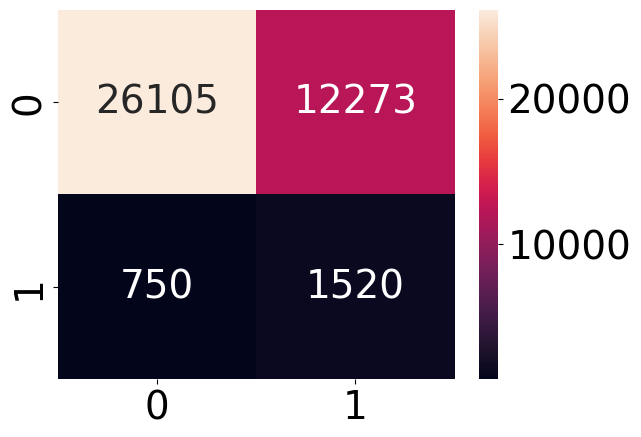

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

<Axes: >

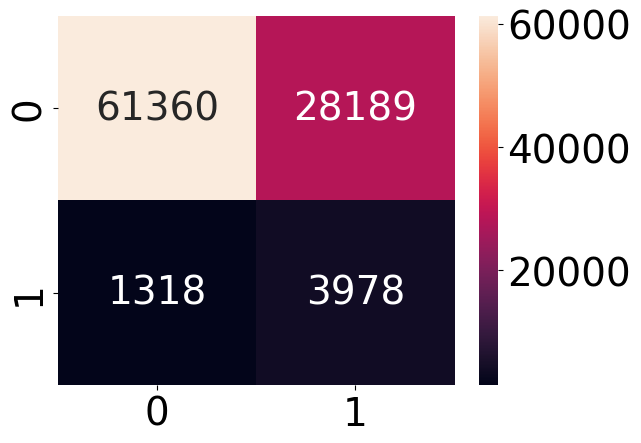

In [39]:
y_pred2 = best_model.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred2), annot=True, fmt='d')

In [ ]:
# # probabilities for fraud
fraud_probs_stage1 = best_model.predict_proba(X_test)[:, 1]  

# Fraud probabilities for second stage model > 30%
# 1st stage: optimize recall, 2nd stage optimize precision
suspicious_cases = X_test[fraud_probs_stage1 > 0.30] # only use propabilities larger 30% for2nd stage model

# not needed 
y_suspicious = y_test[fraud_probs_stage1 > 0.30] # snot used

In [28]:
# decision tree for second stage
dt_model_stage2 = LogisticRegression(C=0.1, 
    penalty='l1', 
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=500)
dt_model_stage2.fit(suspicious_cases, y_suspicious)

fraud_probs_stage2 = dt_model_stage2.predict_proba(suspicious_cases)[:, 1]

# categorize risk
def risk_category(prob):
    if prob > 0.7:
        return "High Risk"
    elif prob > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

suspicious_cases_output = suspicious_cases.copy()
suspicious_cases_output["Risk Level"] = [risk_category(p) for p in fraud_probs_stage2]


In [29]:
high_risk_cases = suspicious_cases_output#[suspicious_cases_output["Risk Level"] == "High Risk"]
print(high_risk_cases.head())

        disrict  client_catg  region  1transactions_count   
113164       60           11     101                   64  \
61311        63           11     306                    7   
68831        60           11     101                   35   
27730        69           11     107                    4   
87824        60           11     101                    3   

        consumption_level_1_mean  consumption_level_2_mean   
113164                692.359375                139.171875  \
61311                 356.285714                  0.000000   
68831                 458.342857                  0.000000   
27730                   0.000000                  0.000000   
87824                3471.333333                  0.000000   

        consumption_level_3_mean  consumption_level_4_mean   Risk Level  
113164                 78.546875                 14.015625  Medium Risk  
61311                   0.000000                  0.000000     Low Risk  
68831                   0.000000      

<Axes: xlabel='Risk Level'>

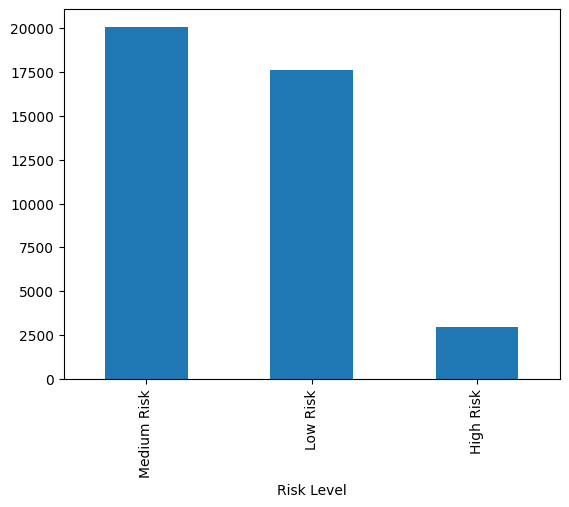

In [ ]:
# plot high risk for each risk level barplot count
high_risk_cases["Risk Level"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Sentinel Risk Assessor$^{TM}$')

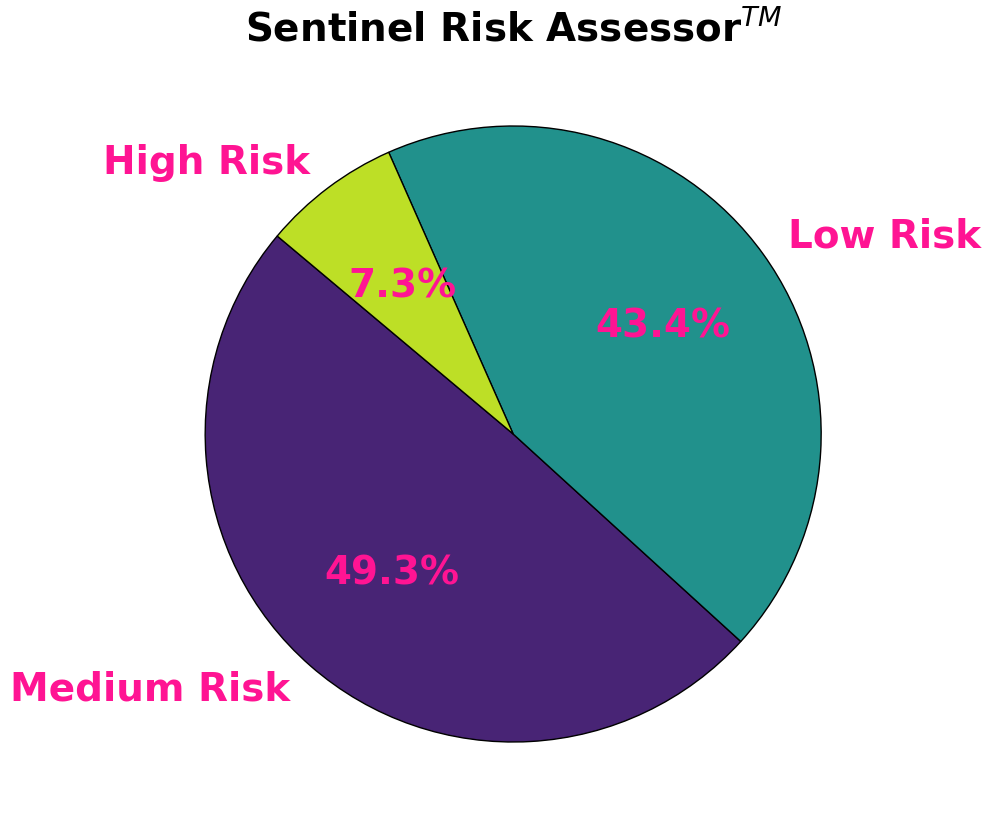

In [31]:
import matplotlib.cm as cm

# Count occurrences of each Risk Level
risk_counts = high_risk_cases['Risk Level'].value_counts()

# Define a function to filter small percentages
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''  # Hide values <5%

# Generate distinct, high-contrast colors from Viridis
num_categories = len(risk_counts)
color_indices = np.linspace(0.1, 0.9, num_categories)  # Evenly spaced values for contrast
colors = [cm.viridis(i) for i in color_indices]  # Extract colors

# Set larger font size globally
plt.rcParams.update({'font.size': 28})

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(risk_counts, labels=risk_counts.index, autopct=autopct_format, 
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'}, 
        textprops={'fontsize': 28, 'color': 'deeppink','fontweight': 'bold'})  # Pink text)  # Larger text

plt.title("Sentinel Risk Assessor$^{TM}$", fontsize=28, fontweight='bold')  

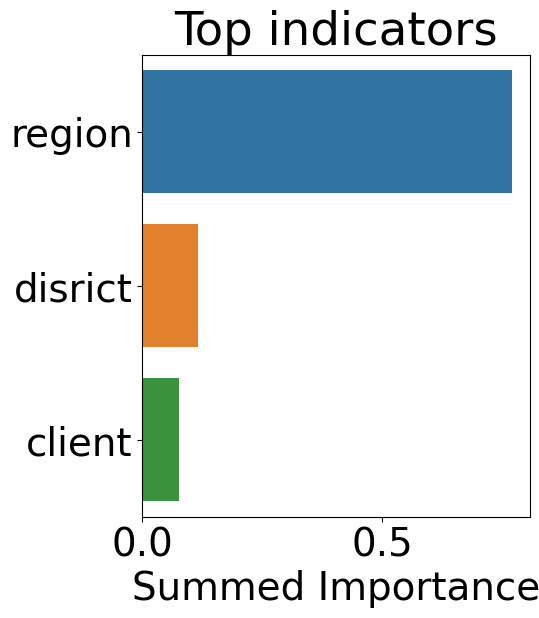

In [36]:
# Access the model (step 'model') after fitting the pipeline
model = best_model.named_steps['model']

# 1. Access the preprocessor's encoder to get transformed feature names
encoder = preprocessor.transformers_[0][1].named_steps['one_hot_encoding']  # Access OneHotEncoder
columns = preprocessor.transformers_[0][2]  # Columns transformed by OneHotEncoder

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(columns)

# 2. Extract feature importances from the model (These are based on the original features)
feature_importance = model.feature_importances_

# 3. Match feature importances with transformed feature names
# We need to replicate the importance for each one-hot encoded feature based on the original features
mapped_feature_importances = []

# Mapping categorical feature importances to one-hot encoded features
for feature in columns:
    # Find the indices of the one-hot encoded columns corresponding to the original feature
    encoded_columns_indices = [i for i, name in enumerate(encoded_feature_names) if name.startswith(feature)]
    avg_importance = feature_importance[X.columns.get_loc(feature)]  # Get the importance for the original feature
    mapped_feature_importances.extend([avg_importance] * len(encoded_columns_indices))  # Map the importance to each one-hot encoded column

# 4. Ensure the lengths match
assert len(mapped_feature_importances) == len(encoded_feature_names), f"Length mismatch: {len(mapped_feature_importances)} != {len(encoded_feature_names)}"

# 5. Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': mapped_feature_importances})

# 6. Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# 1. Extract prefixes (before the first underscore) from feature names
feature_importance_df['Prefix'] = feature_importance_df['Feature'].str.split('_').str[0]

# 2. Sum importances by prefix
prefix_importance_df = feature_importance_df.groupby('Prefix')['Importance'].sum().reset_index()

# 3. Sort the summed importances in descending order
prefix_importance_df = prefix_importance_df.sort_values('Importance', ascending=False)

# 4. Plot the summed importances
plt.figure(figsize=(5, 6))
sns.barplot(x='Importance', y='Prefix', data=prefix_importance_df.head(14))  # Display top 14 prefixes
plt.title(f'Top indicators')
plt.xlabel('Summed Importance')
plt.ylabel('')
plt.show()

<Axes: >

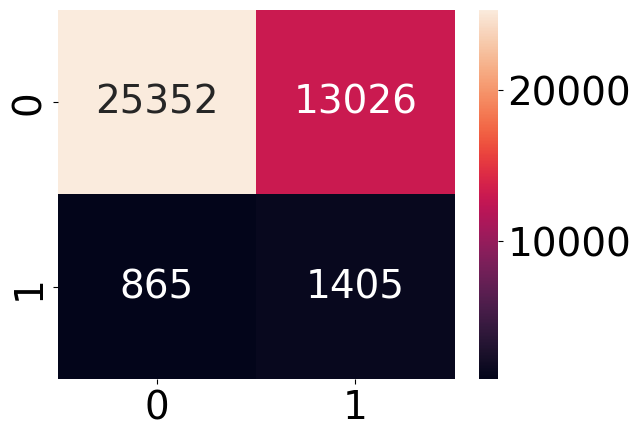

In [40]:
#confusion matrix for second stage model
y_pred3 = dt_model_stage2.predict(suspicious_cases)
sns.heatmap(confusion_matrix(y_suspicious, y_pred3), annot=True, fmt='d')

In [42]:
#report of second stage model
print(classification_report(y_suspicious, y_pred3))


              precision    recall  f1-score   support

         0.0       0.97      0.66      0.78     38378
         1.0       0.10      0.62      0.17      2270

    accuracy                           0.66     40648
   macro avg       0.53      0.64      0.48     40648
weighted avg       0.92      0.66      0.75     40648

